# Forecasting Using FBProphet - CrudePalmOil

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd
import datetime

from fbprophet import Prophet

#visualization libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df = pd.read_csv("../kaggle/MPOB_data2.csv")
df.head()

,MonthYear,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
0,1/1/2006,424,532,930,591,733,569,750,445,407
1,2/1/2006,445,535,921,595,723,591,761,430,405
2,3/1/2006,440,539,902,606,742,575,807,410,431
3,4/1/2006,439,540,899,659,796,578,840,394,437
4,5/1/2006,440,588,892,679,838,583,841,408,447


In [3]:
df.dtypes

MonthYear       object
CrudePalmOil     int64
SoyabeanOil      int64
GroundnutOil     int64
SunflowerOil     int64
RapeseedOil      int64
CoconutOil       int64
FishOil          int64
Tallow           int64
Lard             int64
dtype: object

In [4]:
#df['Year'] = pd.DatetimeIndex(dfx['MonthYear']).year
#df['Month'] = pd.DatetimeIndex(dfx['MonthYear']).month
#df['MonYear'] = pd.to_datetime(dfx['MonthYear']).dt.to_period('M')
#df['MonthYear'] =  pd.to_datetime(dfx['MonthYear'])
df['MonthYear'] = pd.DatetimeIndex(df['MonthYear'])
df.dtypes

MonthYear       datetime64[ns]
CrudePalmOil             int64
SoyabeanOil              int64
GroundnutOil             int64
SunflowerOil             int64
RapeseedOil              int64
CoconutOil               int64
FishOil                  int64
Tallow                   int64
Lard                     int64
dtype: object

Reference: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

Prophet imposes the strict condition that the input columns be named ds (the time column) and y (the metric column), so let's rename the columns in our DataFrame. ALso remove other column.

In [5]:
dfx = df.drop(columns=['SoyabeanOil', 'GroundnutOil','SunflowerOil','RapeseedOil','CoconutOil','FishOil','Tallow','Lard'])
dfx = dfx.rename(columns={'MonthYear': 'ds',
                        'CrudePalmOil': 'y'})

dfx.head(5)

,ds,y
0,2006-01-01,424
1,2006-02-01,445
2,2006-03-01,440
3,2006-04-01,439
4,2006-05-01,440


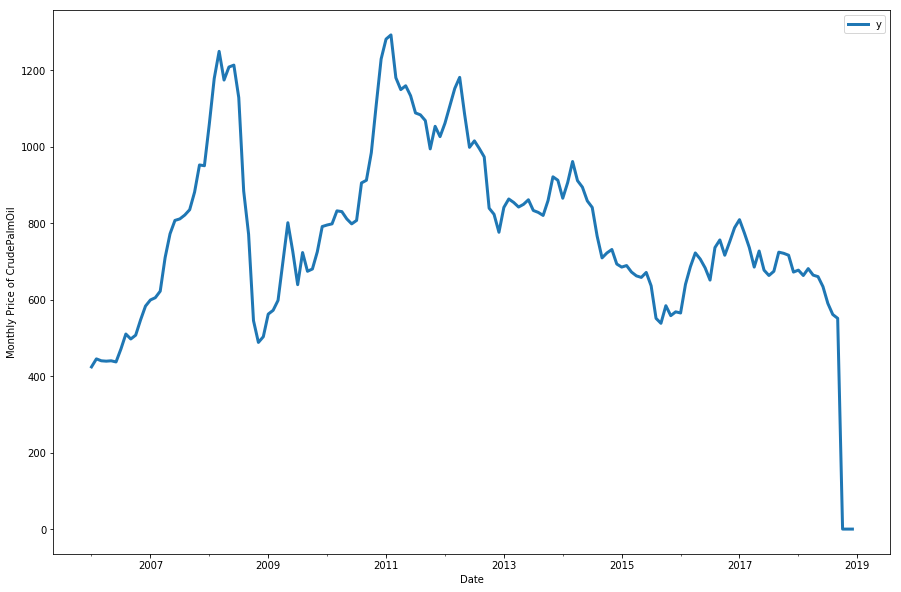

In [8]:
ax = dfx.set_index('ds').plot(figsize=(15, 10), linewidth=3,)
ax.set_ylabel('Monthly Price of CrudePalmOil')
ax.set_xlabel('Date')

plt.show()

To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

In [11]:
## set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
my_model.fit(dfx)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
187,2021-08-01
188,2021-09-01
189,2021-10-01
190,2021-11-01
191,2021-12-01


In [17]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
172,2020-05-01,497.009675,165.156903,831.441085
173,2020-06-01,466.653082,128.603487,782.725616
174,2020-07-01,438.735340,75.015094,777.893171
175,2020-08-01,428.863024,99.718868,753.055906
176,2020-09-01,414.860710,85.131476,729.947034
177,2020-10-01,348.922114,10.974007,671.837505
178,2020-11-01,371.760186,35.771162,703.846772
179,2020-12-01,376.989923,57.211737,691.977135
180,2021-01-01,406.285191,90.071332,728.932790
181,2021-02-01,410.789441,68.490990,742.900826


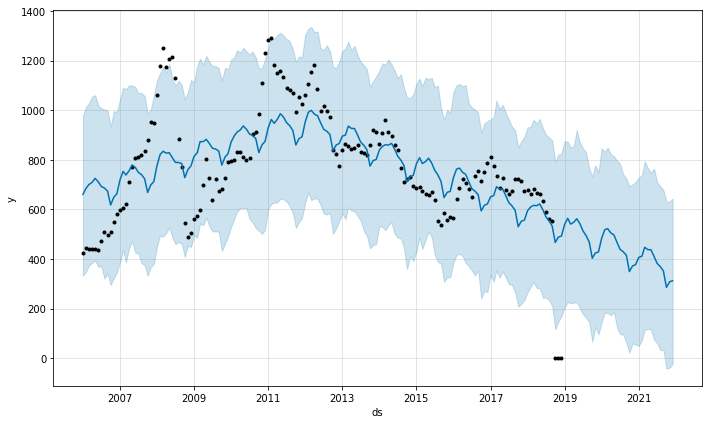

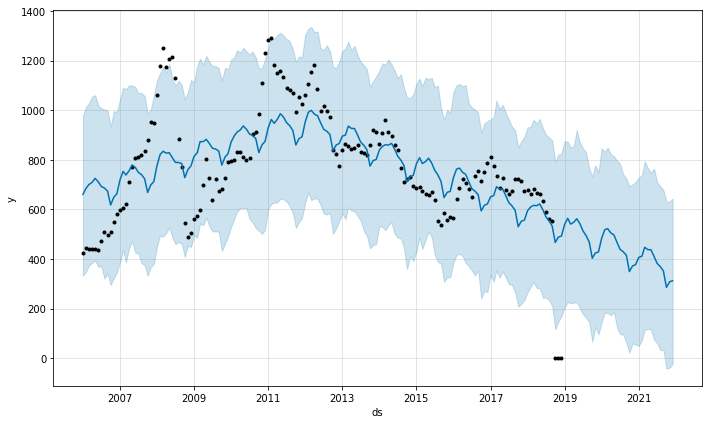

In [14]:
my_model.plot(forecast,
              uncertainty=True)

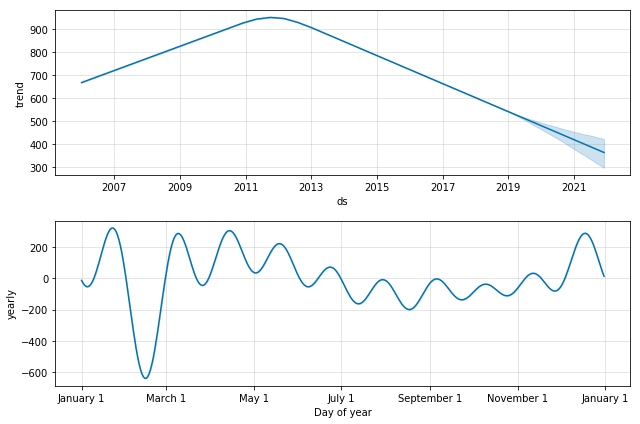

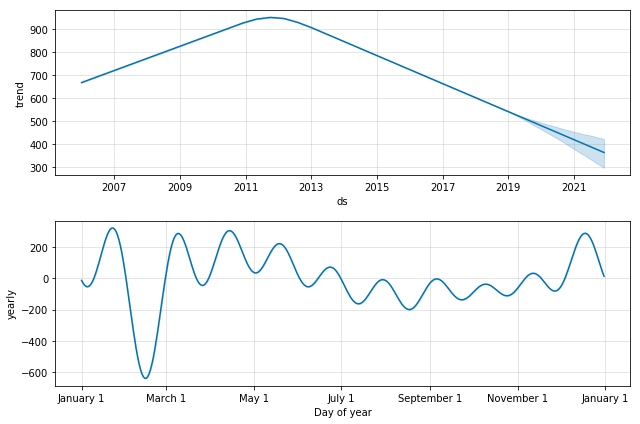

In [15]:
my_model.plot_components(forecast)